In [3]:
#in His Name

# اضافه کردن کتاب‌خانه‌های مورد نیاز

در صورتیکه کتاب‌خانه‌ها را تاکنون نصب نکرده‌اید، به کمک دستورات زیر این کتاب‌خانه‌ها را اضافه نمایید

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ابتدا فایل
`undernourishment.csv`
که همراه با این نوت‌بوک دانلود کرده‌اید را به وسیله‌ی کتابخانه
`pandas`
می‌خوانیم

In [155]:
data = pd.read_csv('undernourishment.csv')

این مجموعه داده شامل شاخص سوءتغذیه مناطق مختلف جهان برای شانزده سال متوالی است 

In [11]:
regions = np.unique(data['Entity'])
print(regions)

['East Asia & Pacific' 'Europe & Central Asia' 'Latin America & Caribbean'
 'Middle East & North Africa' 'North America' 'South Asia'
 'Sub-Saharan Africa' 'World']


به کمک تابع زیر سری زمانی شاخص سوءتغذیه را برای مناطق مختلف جهان رسم می‌کنید

In [12]:
def plot(regions):
    fig, ax = plt.subplots(figsize=(14,8))
    for region in regions:
        region_data = data[data['Entity'] == region]
        line, = ax.plot(region_data['Year'], region_data['index'], marker='o')
        line.set_label(region)
    ax.legend()

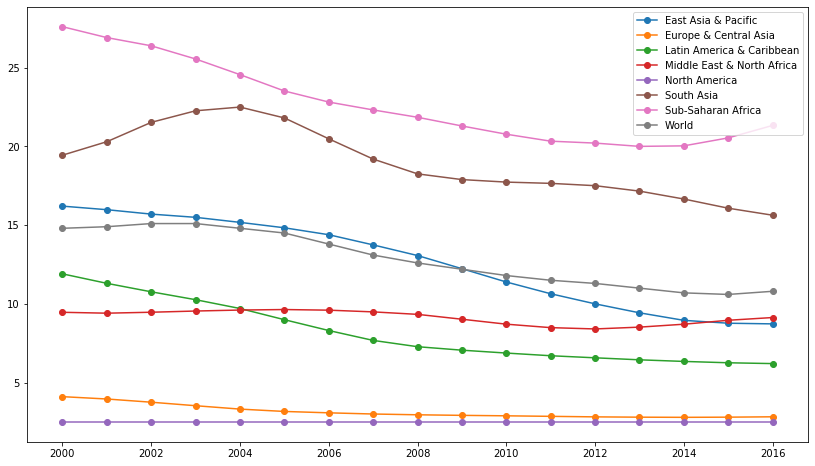

In [13]:
plot(regions)

# آفریقا

از این قسمت به بعد روی داده قاره آفریقا متمرکز خواهیم شد

In [168]:
Africa = pd.read_csv('Africa_data.csv')

 این داده شامل نام و طول و عرض جغرافیایی و شاخص سوءتغذیه در یکسال مشخص کشور های آفریقایی است 

در این قسمت به کمک کد آماده داده را روی نقشه قاره آفریقا رسم می‌کنیم

کد آماده از آدرس زیر برداشته شده است

https://github.com/tomasrasymas/geo-heatmap

ممکن است برای اجرای کد آماده نیاز به نصب کتاب‌خانه‌های جدیدی داشته باشید

In [11]:
!pip install folium

In [161]:
heatmap = pd.DataFrame()
heatmap['name'] = Africa['Country']
heatmap['lat'] = Africa['Latitude']
heatmap['lon'] = Africa['Longitude']
heatmap['magnitude'] = Africa['index']

In [162]:
heatmap.to_csv('heatmap.csv', index=False, sep=';')

In [163]:
from IPython.display import IFrame
!python geo_heatmap.py -hmmo 0.1 -hmr 30 -hmb 10
IFrame(src='geo_heatmap_main.html', width=900, height=700)

**************************************************
csv - heatmap.csv
output - geo_heatmap.html
map_location - ['2.0', '17.0']
map_zoom_start - 4
heatmap_radius - 30
heatmap_blur - 10
heatmap_min_opocity - 0.1
heatmap_max_zoom - 4
tiles - OpenStreetMap
max_value - None
**************************************************
Output: geo_heatmap.html


# نزدیکترین همسایه

در این قسمت باید برازنده نزدیکترین همسایه را پیاده‌سازی کنید

تابع زیر یک عرض و طول جغرافیایی و داده آموزش را دریافت کرده و شاخص سوءتغذیه نزدیکترین مکان به آن طول و عرض جغرافیایی را گزارش می‌کند.

پس باید ابتدا فاصله نقطه داده شده را تا تک‌تک داده‌های آموزش حساب کرده و در نهایت شاخص سوءتغذیه نزدیکترین داده آموزش را گزارش نمایید

برای محاسبه فاصله از این صفحه استفاده کنید

https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude


با استفاده از توابع 
`numpy`
به جای
`math`
می‌توانید فاصله نقطه داده شده تا همه داده‌های آموزش را در یک خط کد حساب کنید

فرمت داده آموزش و نام ستون‌های آن مانند داده 
`Africa_data.csv`
می‌باشد

In [169]:
def one_near(latitude, longitude, train):
    
    return train.iloc[[(6373*2*np.arctan2(np.sqrt(np.sin((train['Latitude']-latitude)/2)**2+np.cos(train['Latitude'])*np.cos(latitude)*np.sin((train['Longitude']-longitude)/2)**2),np.sqrt(1-np.sin((train['Latitude']-latitude)/2)**2+np.cos(train['Latitude'])*np.cos(latitude)*np.sin((train['Longitude']-longitude)/2)**2))).idxmin()]]['index'].values[0]

در این قسمت نتیجه تابع خود را روی چندین نقطه از نقشه مشاهده می‌کنید

In [170]:
heatmap = pd.DataFrame(columns=['name', 'lat', 'lon', 'magnitude'])
Latitudes = np.linspace(min(Africa['Latitude']), max(Africa['Latitude']), num=20)
Longitudes = np.linspace(min(Africa['Longitude']), max(Africa['Longitude']), num=20)

i = 0
for latitude in Latitudes:
    for longitude in Longitudes:
        magnitude = one_near(latitude, longitude, Africa)
        heatmap.loc[i] = ['name' + str(i)] + list([latitude, longitude, magnitude])
        i += 1

heatmap.to_csv('heatmap.csv', index=False, sep=';')

from IPython.display import IFrame
!python geo_heatmap.py -hmmo 0.1 -hmr 30 -hmb 10 -mzs 3
IFrame(src='geo_heatmap.html', width=900, height=700)

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


**************************************************
csv - heatmap.csv
output - geo_heatmap.html
map_location - ['2.0', '17.0']
map_zoom_start - 3
heatmap_radius - 30
heatmap_blur - 10
heatmap_min_opocity - 0.1
heatmap_max_zoom - 4
tiles - OpenStreetMap
max_value - None
**************************************************
Output: geo_heatmap.html


In [2]:
# modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D


In [22]:
Africa = pd.read_csv('Africa_data.csv')
Africa['index'] = np.round(np.array(Africa['index']/10))
Africa['index'] = Africa['index'].astype(int)
Africa['index'] = Africa['index'].astype(str)
X = Africa[['Latitude','Longitude']]
y = Africa['index']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
score = []
#for i in range(1,100):
model = RandomForestClassifier(n_estimators = 200 )
model.fit(X_train,y_train)
y_pred_rf = 10*model.predict(X_test)
acc_rf = accuracy_score(10*y_test,y_pred_rf)
#score.append(acc_rf)
#np.mean(score)
acc_rf



0.4

In [ ]:
#regression
Africa = pd.read_csv('Africa_data.csv')
X = Africa[['Latitude','Longitude']]
y = Africa['index']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
linear_regressor = LinearRegression()

linear_regressor.fit(X_train,y_train)

y_pred_linear = linear_regressor.predict(X_test)
err_linear = mean_absolute_error(y_pred_linear,y_test)
r2_linear = r2_score(y_test,y_pred_linear)
print("mean_abbs_error linear model :", err_linear)
print("r2_score linear model :", r2_linear)

داده را به دو قسمت آموزش و آزمون تقسیم کرده و خطای مربعات را حساب نمایید

# برازنده خطی

داده را به دو قسمت آموزش و آزمون تقسیم کرده و از برازنده خطی استفاده نمایید. در نهایت خطای مربعات را حساب کنید

# جنگل تصادفی

شاخص سوء تغذیه را به نزدیکترین مضرب ده گرد کرده و بر ده تقسیم کنید
حال با برچسب به دست آمده به مثابه یک مسئله دسته‌بندی برخورد کرده و از روش جنگل تصادفی استفاده کنید و در نهایت برچسب پیش بینی شده را در ده ضرب و خطای مربعات را حساب نمایید   

نتیجه مدل جنگل تصادفی را می‌توانید با قطعه کد زیر بر روی نقشه مشاهده کنید 

In [282]:
heatmap = pd.DataFrame(columns=['name', 'lat', 'lon', 'magnitude'])

Latitudes = np.linspace(min(Africa['Latitude']), max(Africa['Latitude']), num=20)
Longitudes = np.linspace(min(Africa['Longitude']), max(Africa['Longitude']), num=20)

i = 0
for latitude in Latitudes:
    for longitude in Longitudes:
        magnitude = 10*model.predict([[latitude, longitude]])[0]
        heatmap.loc[i] = ['name' + str(i)] + list([latitude, longitude, magnitude])
        i += 1

heatmap.to_csv('heatmap.csv', index=False, sep=';')

from IPython.display import IFrame
!python geo_heatmap.py -hmmo 0.1 -hmr 30 -hmb 10 -mzs 3
IFrame(src='geo_heatmap.html', width=900, height=700)

**************************************************
csv - heatmap.csv
output - geo_heatmap.html
map_location - ['2.0', '17.0']
map_zoom_start - 3
heatmap_radius - 30
heatmap_blur - 10
heatmap_min_opocity - 0.1
heatmap_max_zoom - 4
tiles - OpenStreetMap
max_value - None
**************************************************
Output: geo_heatmap.html


در نهایت از بین روش‌های فوق‌الذکر و هر روش دیگری که به ذهنتان می‌رسد تابع برازنده‌ای پیاده کنید که عرض و طول 
جغرافیایی گرفته و شاخص سوءتغذیه را به عنوان خروجی تحویل دهد


مجموع خطای مربعات تابع شما روی داده آزمونی که در اختیارتان قرار نگرفته باید از حد مشخصی کمتر شود تا امتیاز سوال را دریافت کنید 

این تابع را در فایل `functions.py` وارد کرده، ذخیره کنید و ارسال پاسخ را انتخاب نمایید 

اضافه کردن کتابخانه‌های لازم را فراموش نکنید

برای اینکه به مدل‌های کتابخانه `sklearn` 
تک داده به عنوان ورودی دهید به این ترتیب عمل کنید تا با خطا روبرو نشوید

```model.predict([[latitude, longitude]])```

نتیجه این سوال لزوما نشان‌دهنده‌ی ارتباط مکان جغرافیایی و شاخص سوء تغذیه نمی‌باشد